In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import os
import sys
import configparser
sys.path.append(os.path.join('..'))
from physics215ProjectCode import reconstruct_signal as rs
from physics215ProjectCode import error_fn
from physics215ProjectCode import configParser as cP

In [2]:
configpath = '../configs/config2.ini'
category = 'Figure2ExeSummary'

config = cP.parseConfig(configpath, category)

In [3]:
n = int(config['n'])
initial_frequency = eval(config['initial_frequency'])
increments = eval(config['increments'])
final_frequency = eval(config['final_frequency'])
t_end = int(config['t_end'])
t = np.linspace(0,t_end,n)
p = eval(config['p'])

In [27]:
frequencies = np.arange(initial_frequency, final_frequency + 1, increments)
no_of_waves = np.arange(1,len(frequencies)+1)
t = np.linspace(0,1,n)
frequency_x = np.arange(0,n)

Plotting the original signal wile adding a cosine with a different frequency every iteration:

Frequencies [Hz] used: 30, 90, 150, 210, 270, 330, 390, 450, 510, 570, 630

In [5]:
orig_signal_per_f = []

for f_iter in frequencies:
    orig_signal_per_f.append(rs.make_signal(n, initial_frequency, f_iter, increments))

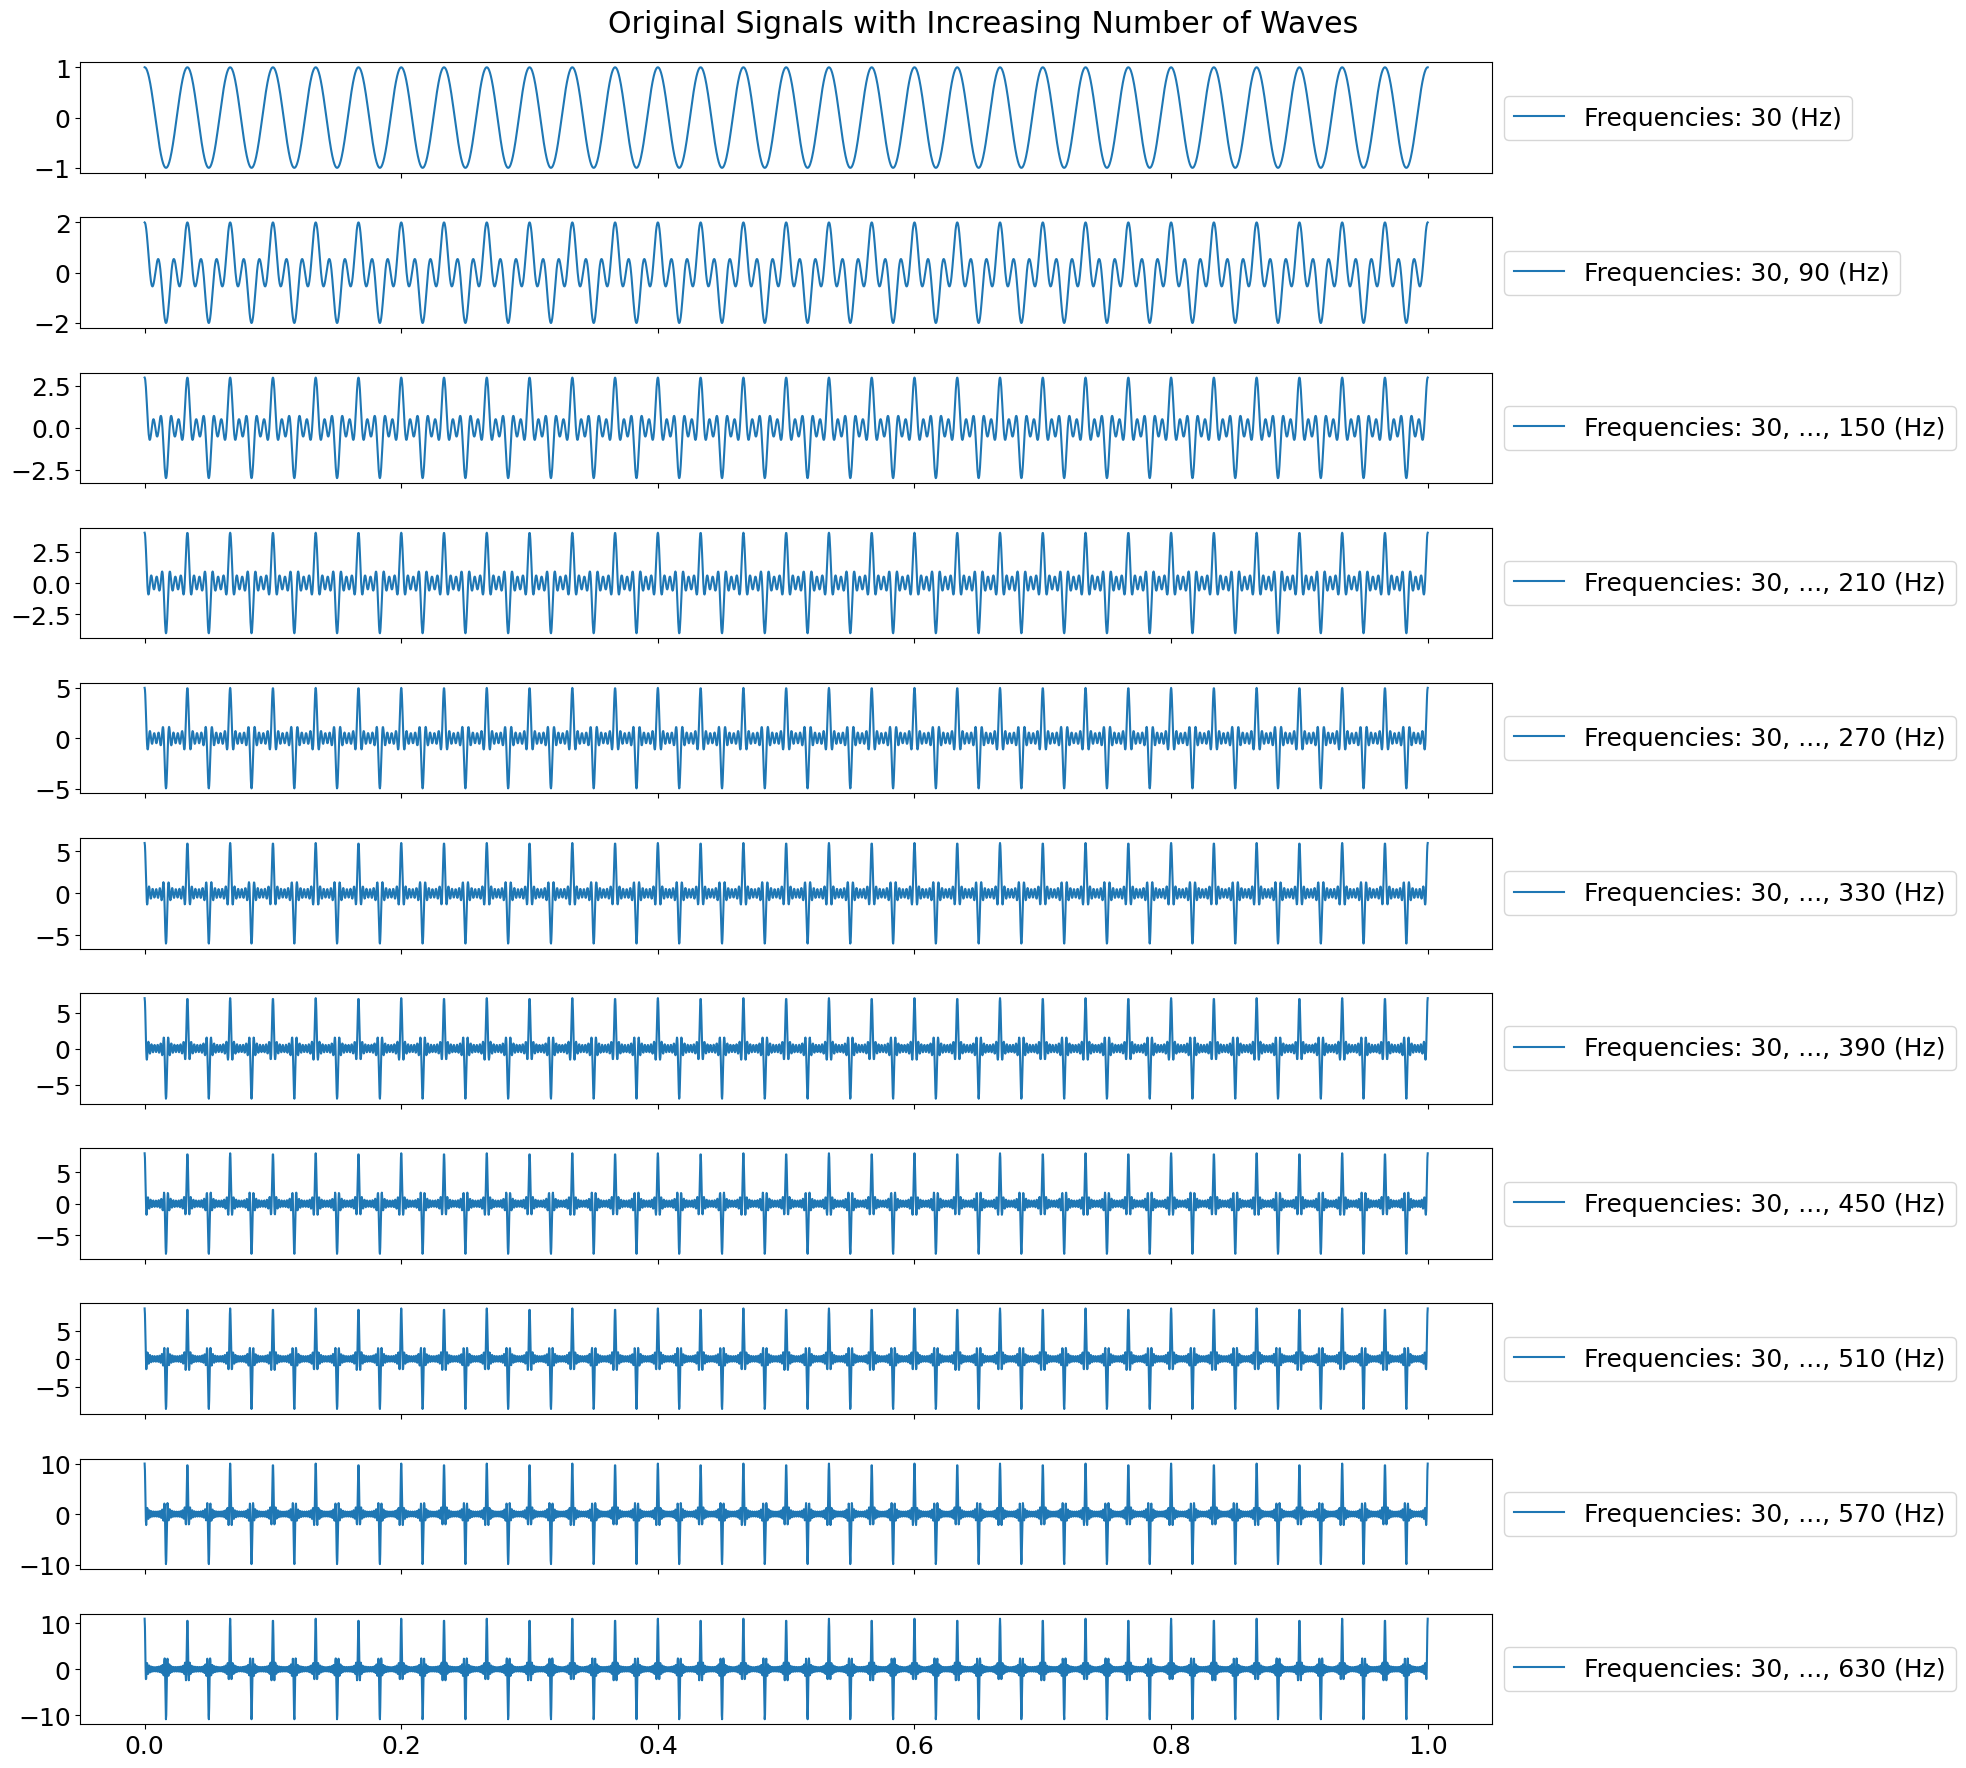

In [6]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})

fig,axs = plt.subplots(len(frequencies),1)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)
legend = "Frequencies: "

for i, pt in enumerate(frequencies):
    if i <= 1:
        if pt == 30:
            legend += str(pt)
        else:
            legend += ", " + str(pt)
    else:
        legend = "Frequencies: 30, ..., " + str(pt)
    axs[i].plot(t,orig_signal_per_f[i], label = legend + " (Hz)")
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if i != len(axs) - 1:
        axs[i].set_xticklabels([])  # Hide x-tick labels

fig.suptitle("Original Signals with Increasing Number of Waves")
plt.tight_layout(rect=[0, -0.5, 1, 1.01])
plt.show()

PSD of original signal:

In [ ]:
PSD_orig = []

for signal_iter in orig_signal_per_f:
    PSD_orig.append(rs.PSD(signal_iter))

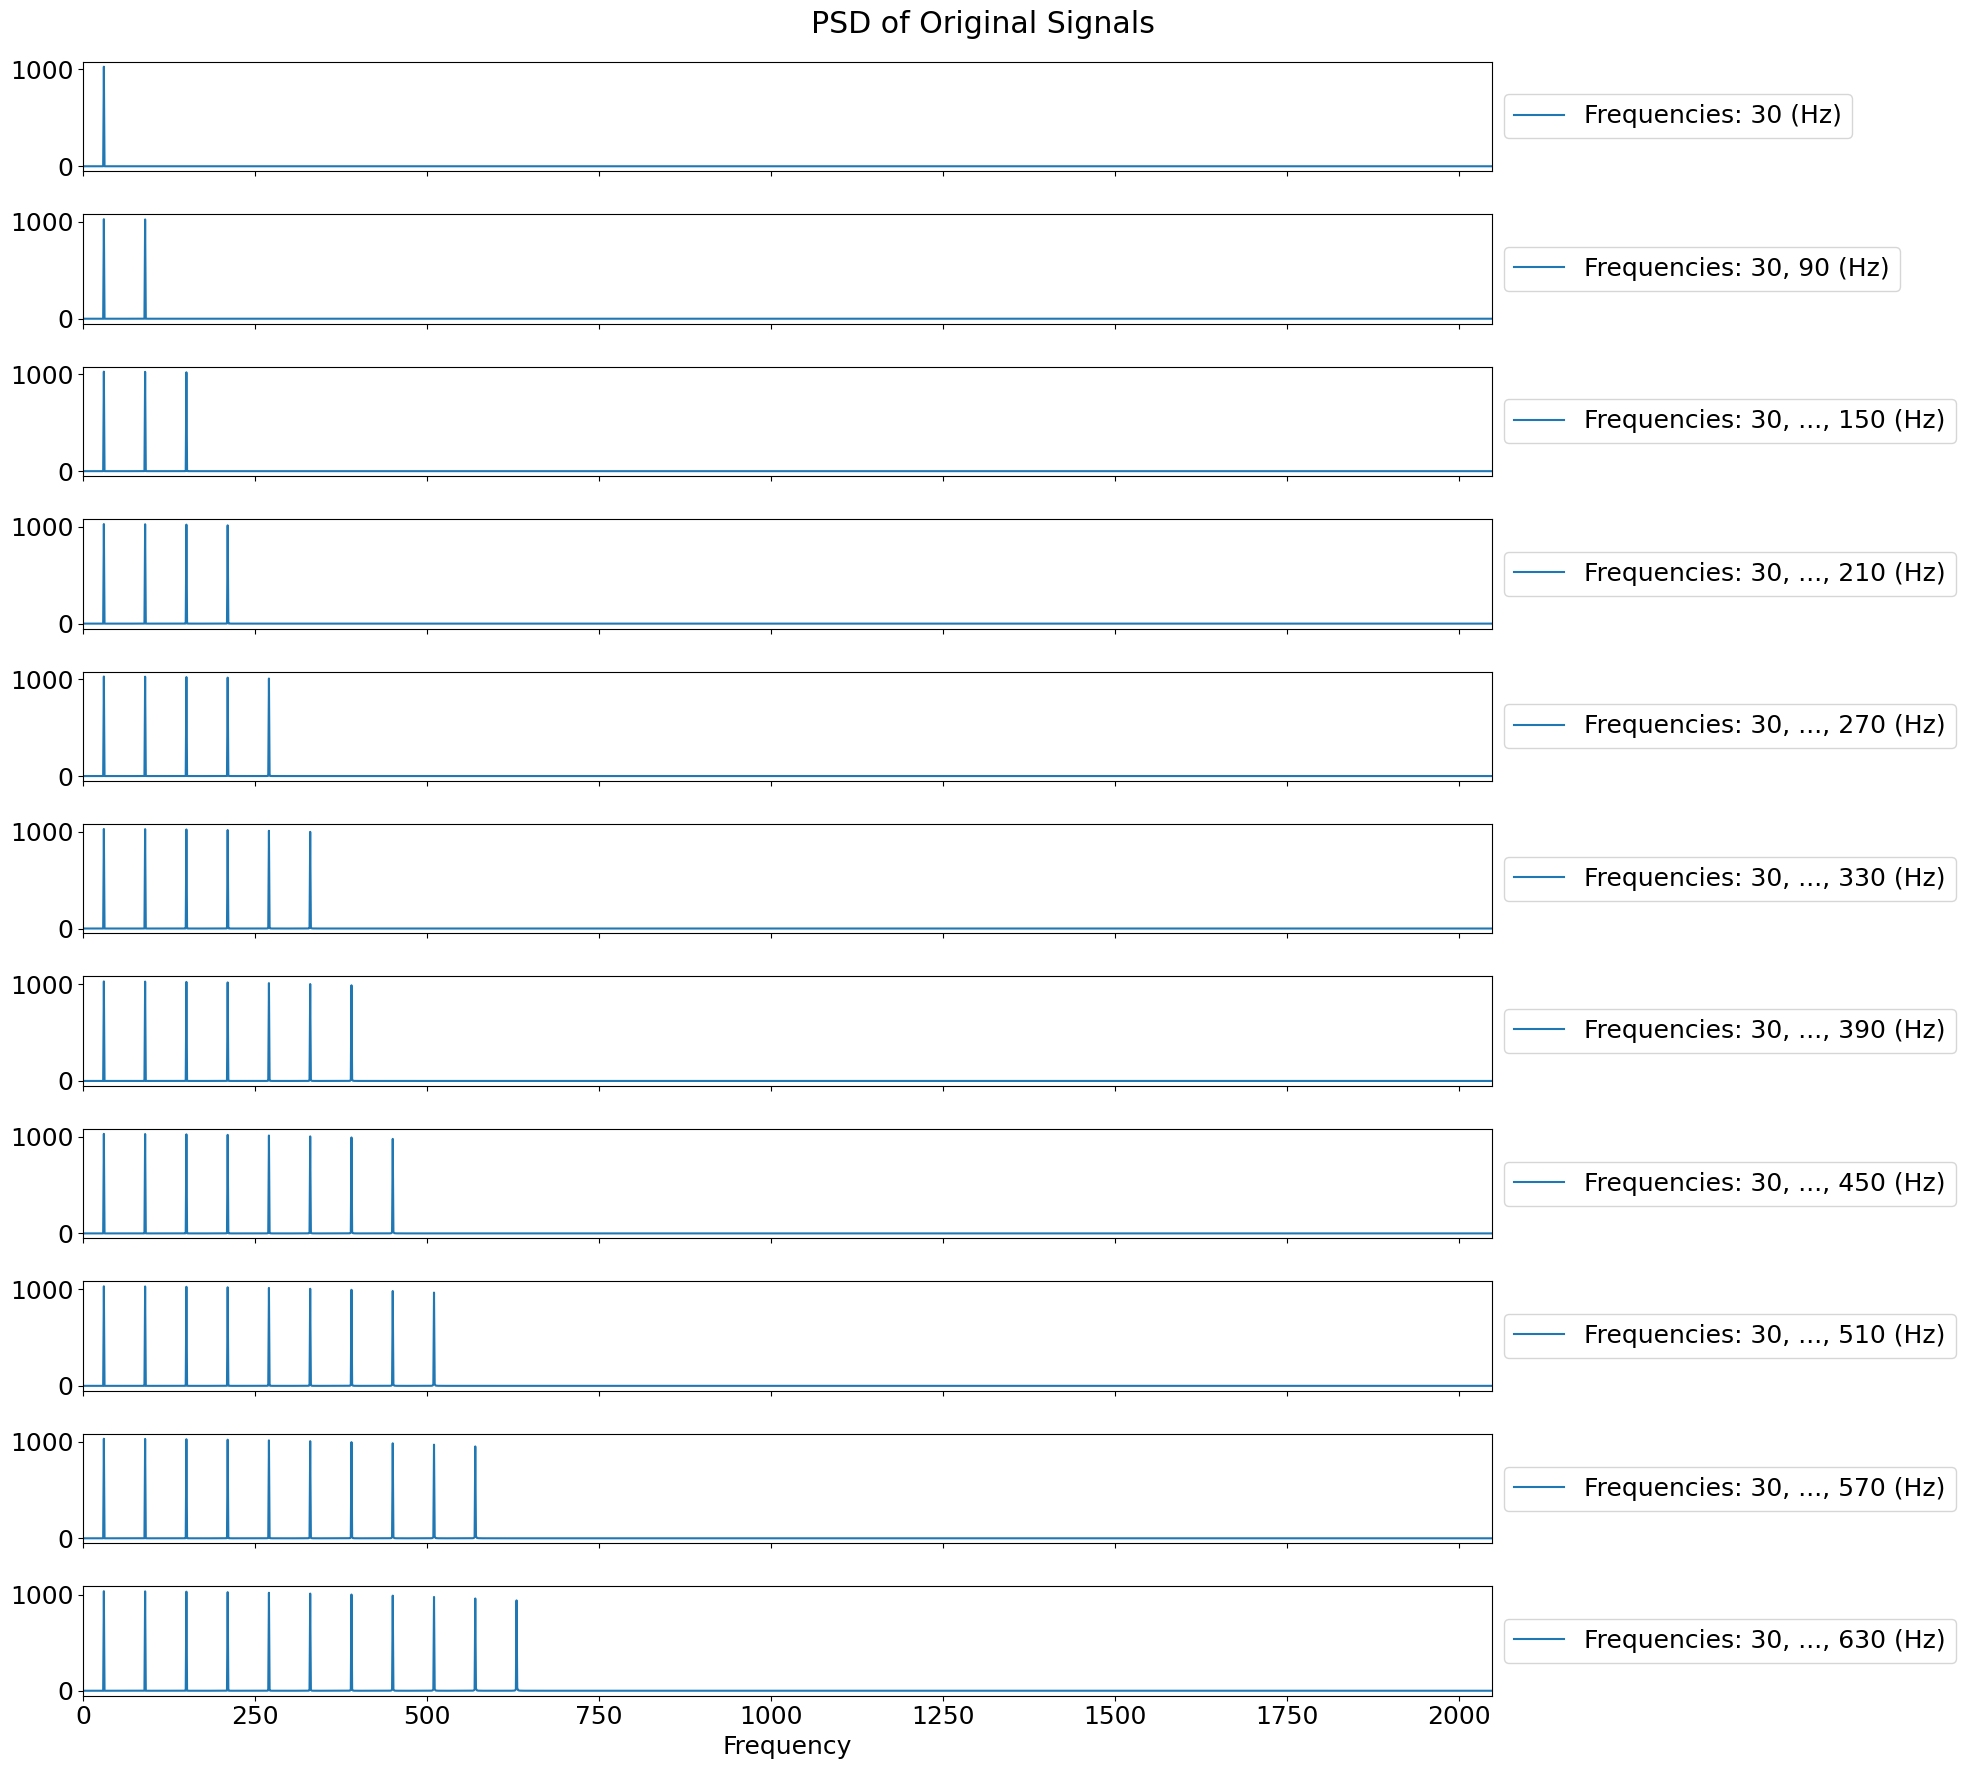

In [9]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})

fig,axs = plt.subplots(len(frequencies),1)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)
legend = "Frequencies: "

for i, pt in enumerate(frequencies):
    if i <= 1:
        if pt == 30:
            legend += str(pt)
        else:
            legend += ", " + str(pt)
    else:
        legend = "Frequencies: 30, ..., " + str(pt)
    axs[i].plot(abs(PSD_orig[i]), label = legend + " (Hz)")
    axs[i].set_xlim(0,n/2)
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if i != len(axs) - 1:
        axs[i].set_xticklabels([])  # Hide x-tick labels

fig.suptitle("PSD of Original Signals")
plt.xlabel("Frequency")
plt.tight_layout(rect=[0, -0.5, 1, 1.01])
plt.show()

Reconstructing the signal above Nyquist frequency:

In [ ]:
reg_recon_per_f = []

for f_iter in orig_signal_per_f:
    signal_recon = rs.nyquist_reconstruction(final_frequency * 2, f_iter)

    n_low = len(signal_recon)
    t_low = np.linspace(0, 1, n_low)
    
    interp_fn = interp1d(t_low, signal_recon, kind='cubic') # interpolate reconstructed signal to match resolution of original signal
    signal_high = interp_fn(t)
    reg_recon_per_f.append(signal_high)

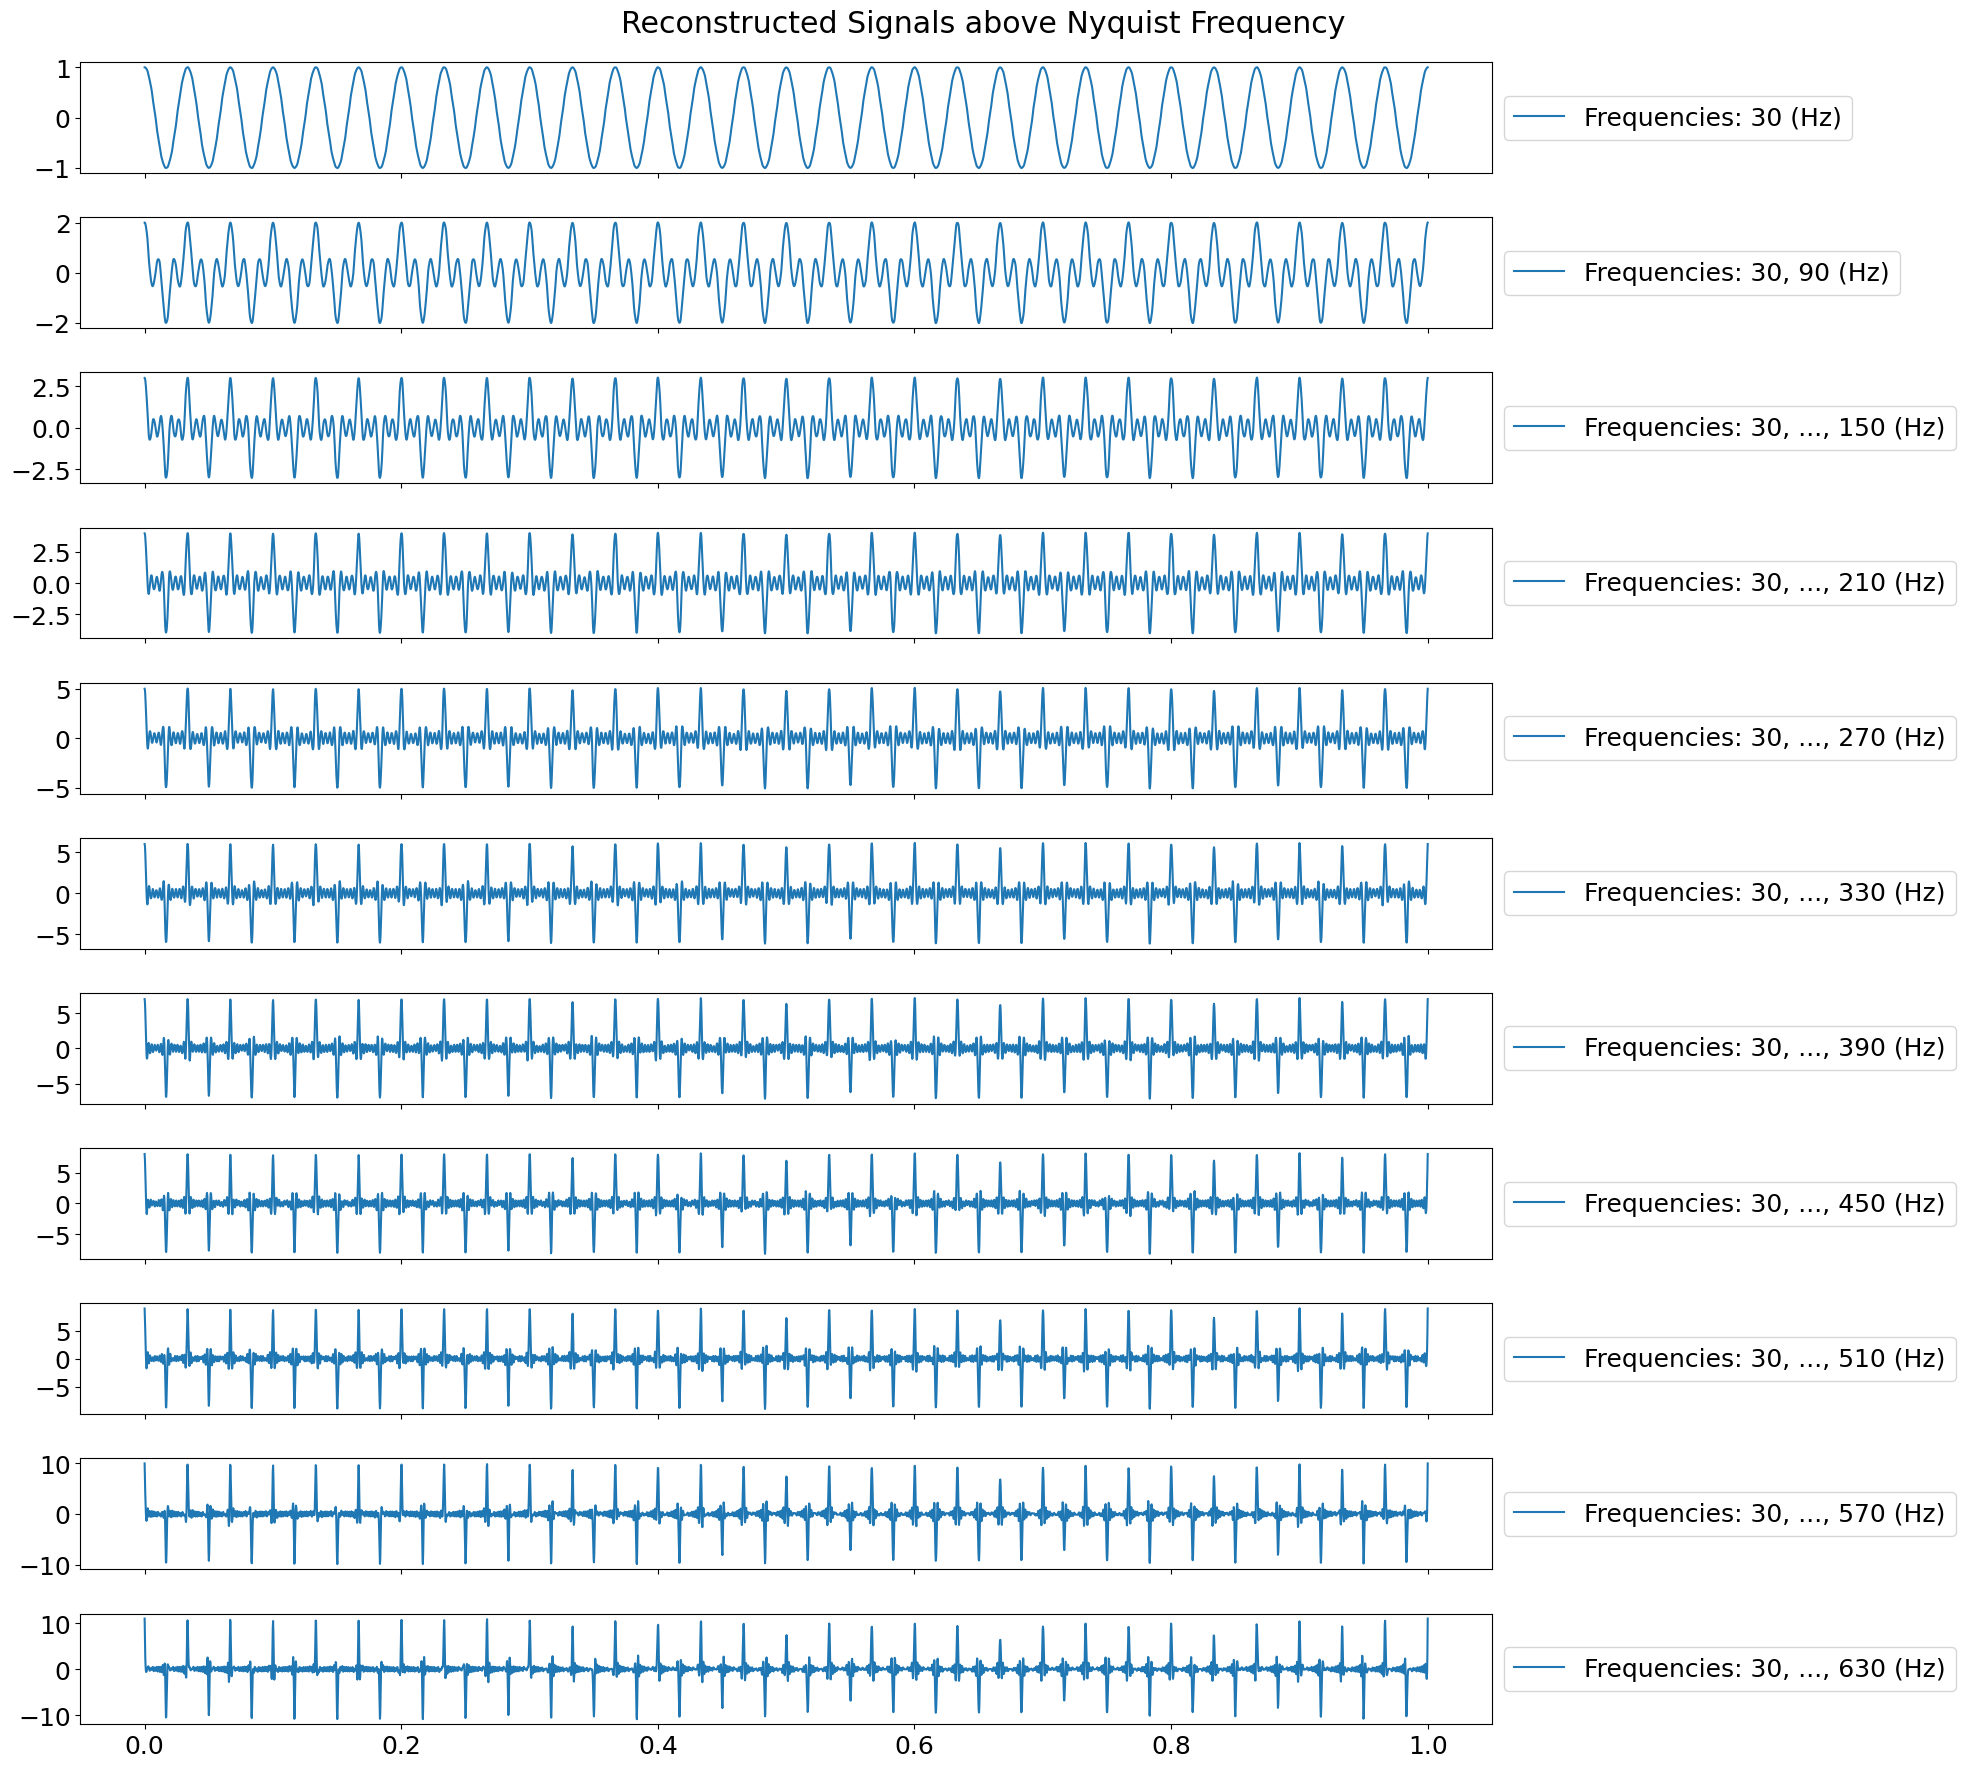

In [12]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})

fig,axs = plt.subplots(len(frequencies),1)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)
legend = "Frequencies: "

for i, pt in enumerate(frequencies):
    if i <= 1:
        if pt == 30:
            legend += str(pt)
        else:
            legend += ", " + str(pt)
    else:
        legend = "Frequencies: 30, ..., " + str(pt)
    axs[i].plot(t,reg_recon_per_f[i], label = legend + " (Hz)")
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if i != len(axs) - 1:
        axs[i].set_xticklabels([])  # Hide x-tick labels

fig.suptitle("Reconstructed Signals above Nyquist Frequency")
plt.tight_layout(rect=[0, -0.5, 1, 1.01])
plt.show()

Plotting PSD of above Nyquist frequency reconstruction:

The placements of the peaks in the PSD should align with the frequencies of the original signal (i.e. 30Hz, 90Hz, etc.).

In [ ]:
PSD_reg = []

for signal_iter in reg_recon_per_f:
    PSD_reg.append(rs.PSD(signal_iter))

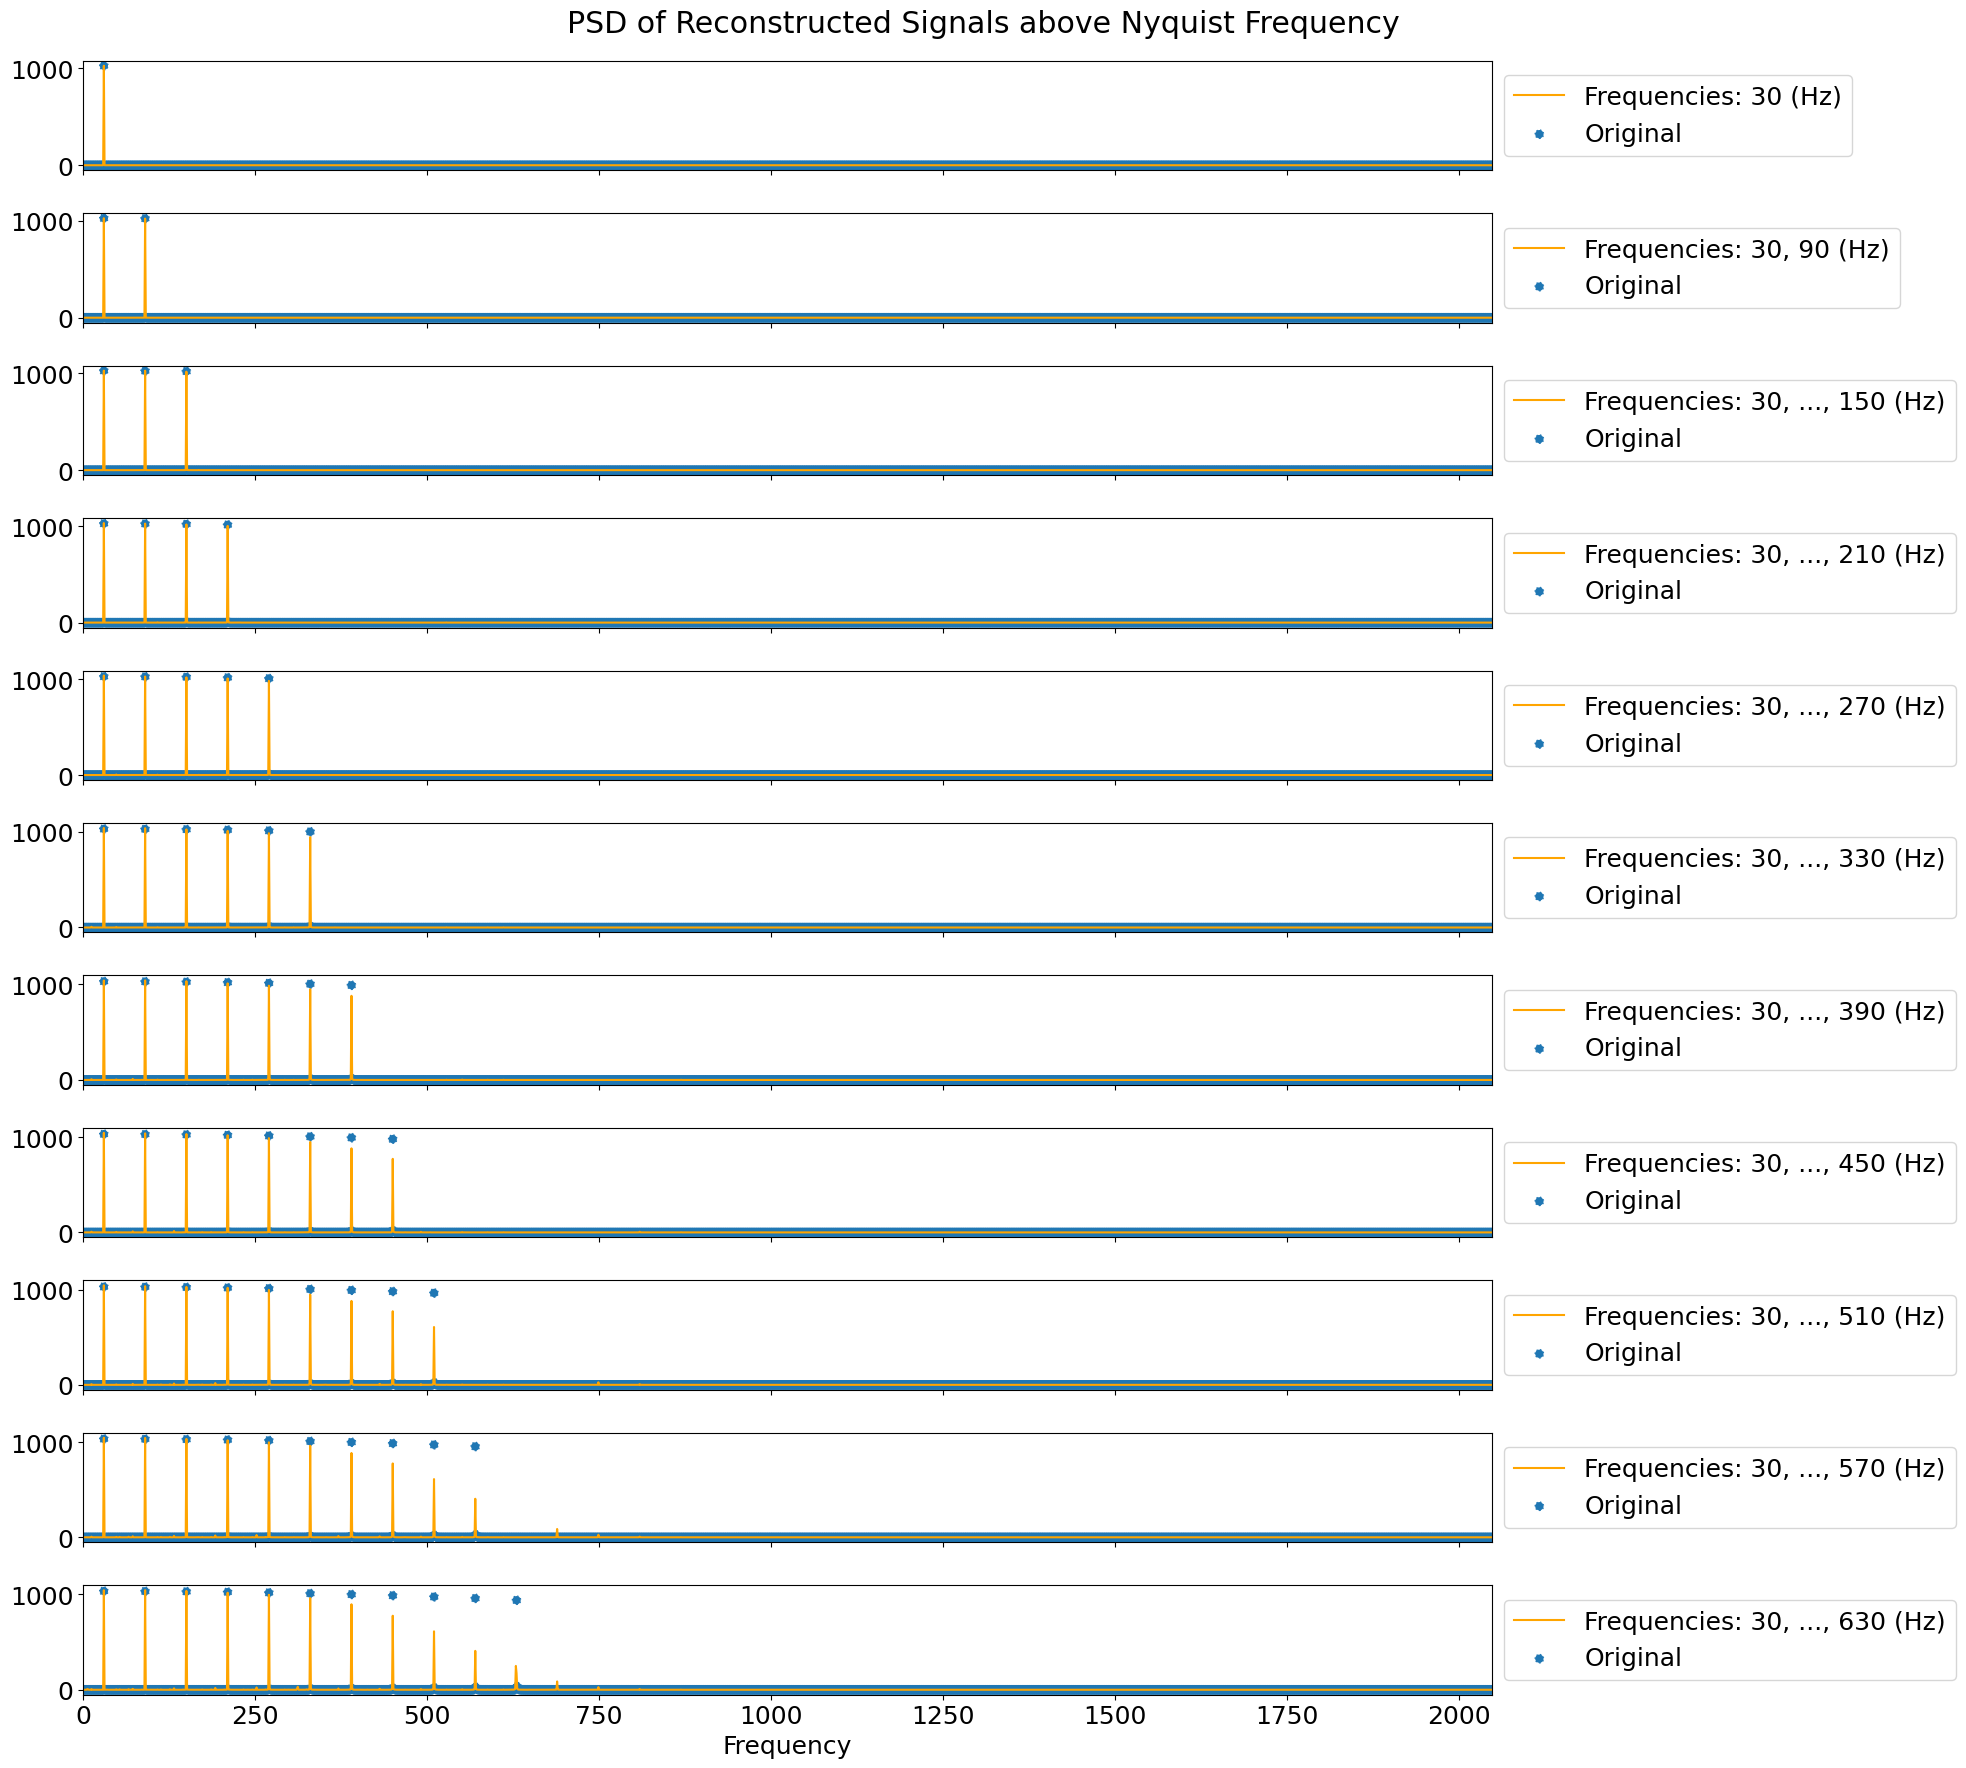

In [15]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})

fig,axs = plt.subplots(len(frequencies),1)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)
legend = "Frequencies: "

for i, pt in enumerate(frequencies):
    if i <= 1:
        if pt == 30:
            legend += str(pt)
        else:
            legend += ", " + str(pt)
    else:
        legend = "Frequencies: 30, ..., " + str(pt)
    axs[i].plot(abs(PSD_reg[i]), label = legend + " (Hz)", color = "orange")
    axs[i].scatter(frequency_x,abs(PSD_orig[i]), label="Original", color="#1f77b4", linestyle='dotted')  # Original signal
    axs[i].set_xlim(0,n/2)
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if i != len(axs) - 1:
        axs[i].set_xticklabels([])  # Hide x-tick labels

fig.suptitle("PSD of Reconstructed Signals above Nyquist Frequency")
plt.xlabel("Frequency")
plt.tight_layout(rect=[0, -0.5, 1, 1.01])
plt.show()

Plotting reconstructed sub-Nyquist frequency:

p = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]

Plotted below is p = 64 as an example

In [ ]:
sub_recon_per_p = []

for p_iter in p:
    sub_recon_per_f = []
    for f_iter in orig_signal_per_f:
        sub_recon_per_f.append(rs.sub_nyquist_reconstruction(p_iter, f_iter))
    sub_recon_per_p.append(sub_recon_per_f)

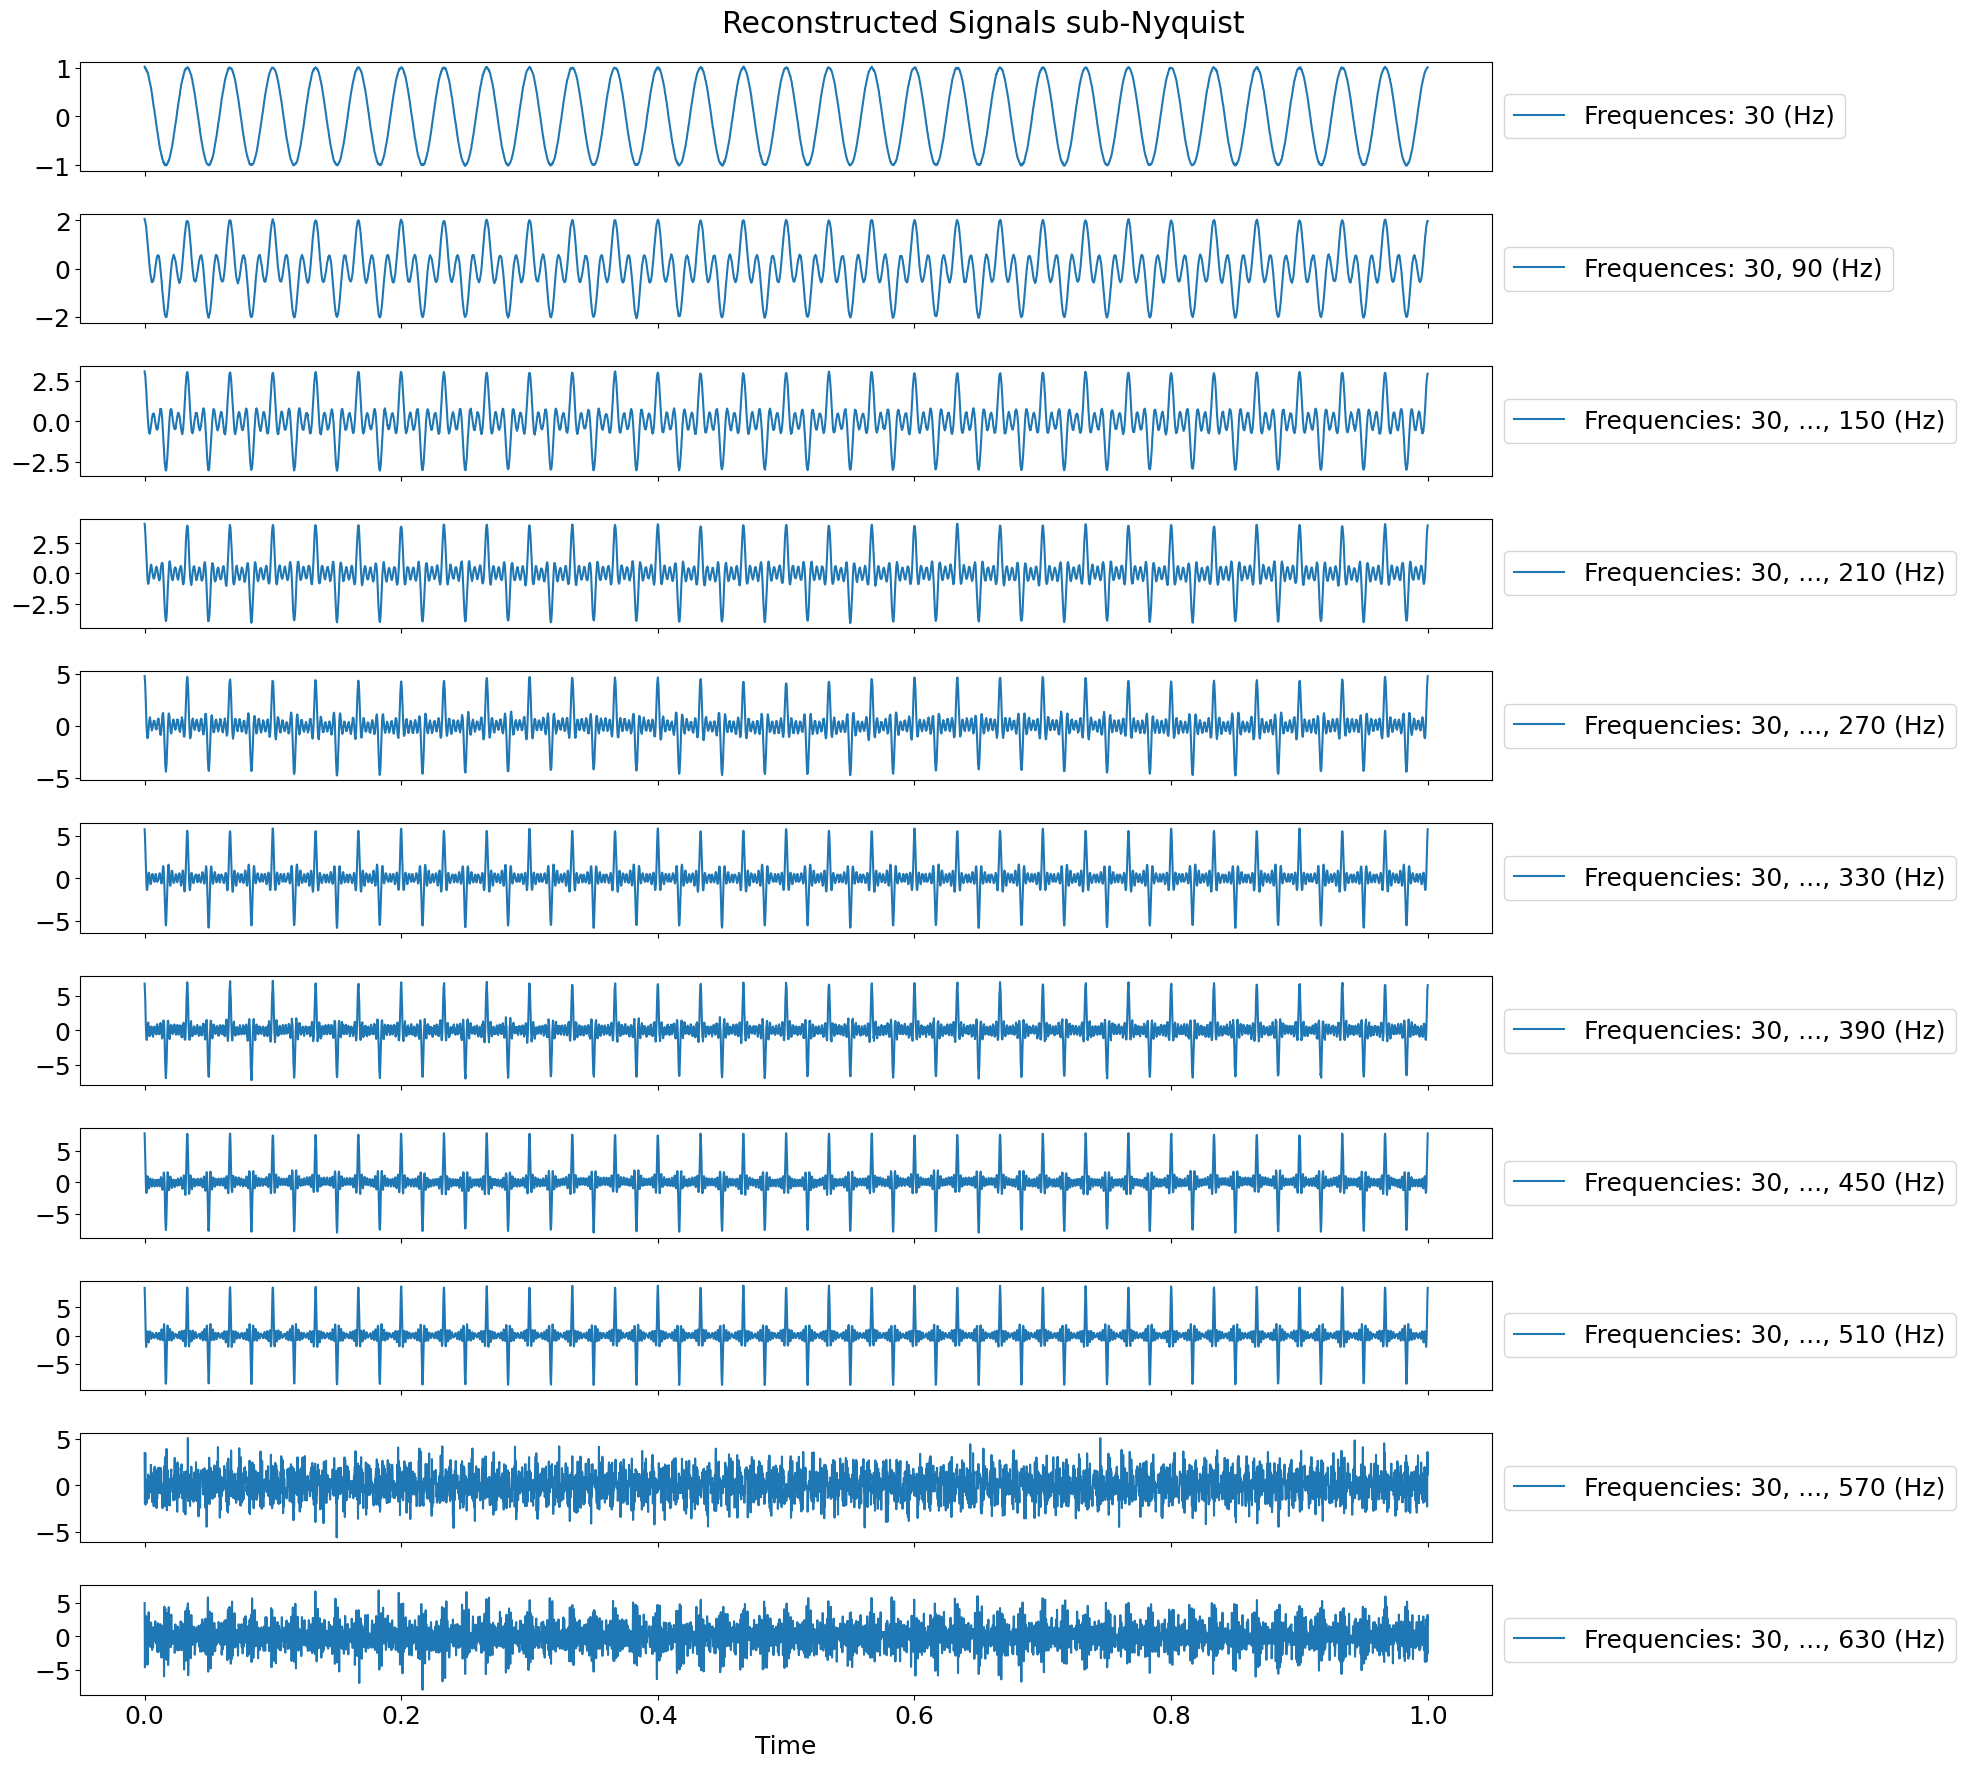

In [18]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})
t_recon = np.linspace(0,1,final_frequency * 2)

fig,axs = plt.subplots(len(frequencies),1)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)
legend = "Frequences: "

for i, pt in enumerate(frequencies):
    if i <= 1:
        if pt == 30:
            legend += str(pt)
        else:
            legend += ", " + str(pt)
    else:
        legend = "Frequencies: 30, ..., " + str(pt)
    axs[i].plot(t,sub_recon_per_p[3][i], label = legend + " (Hz)")
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if i != len(axs) - 1:
        axs[i].set_xticklabels([])  # Hide x-tick labels

fig.suptitle("Reconstructed Signals sub-Nyquist")
plt.xlabel("Time")
plt.tight_layout(rect=[0, -0.5, 1, 1.01])
plt.show()

Plotting PSD of sub-Nyquist reconstruction:

In [ ]:
PSD_sub = []

for p_iter in sub_recon_per_p:
    PSD_sub_per_f = []
    for signal_iter in p_iter:
        PSD_sub_per_f.append(rs.PSD(signal_iter))
    PSD_sub.append(PSD_sub_per_f)

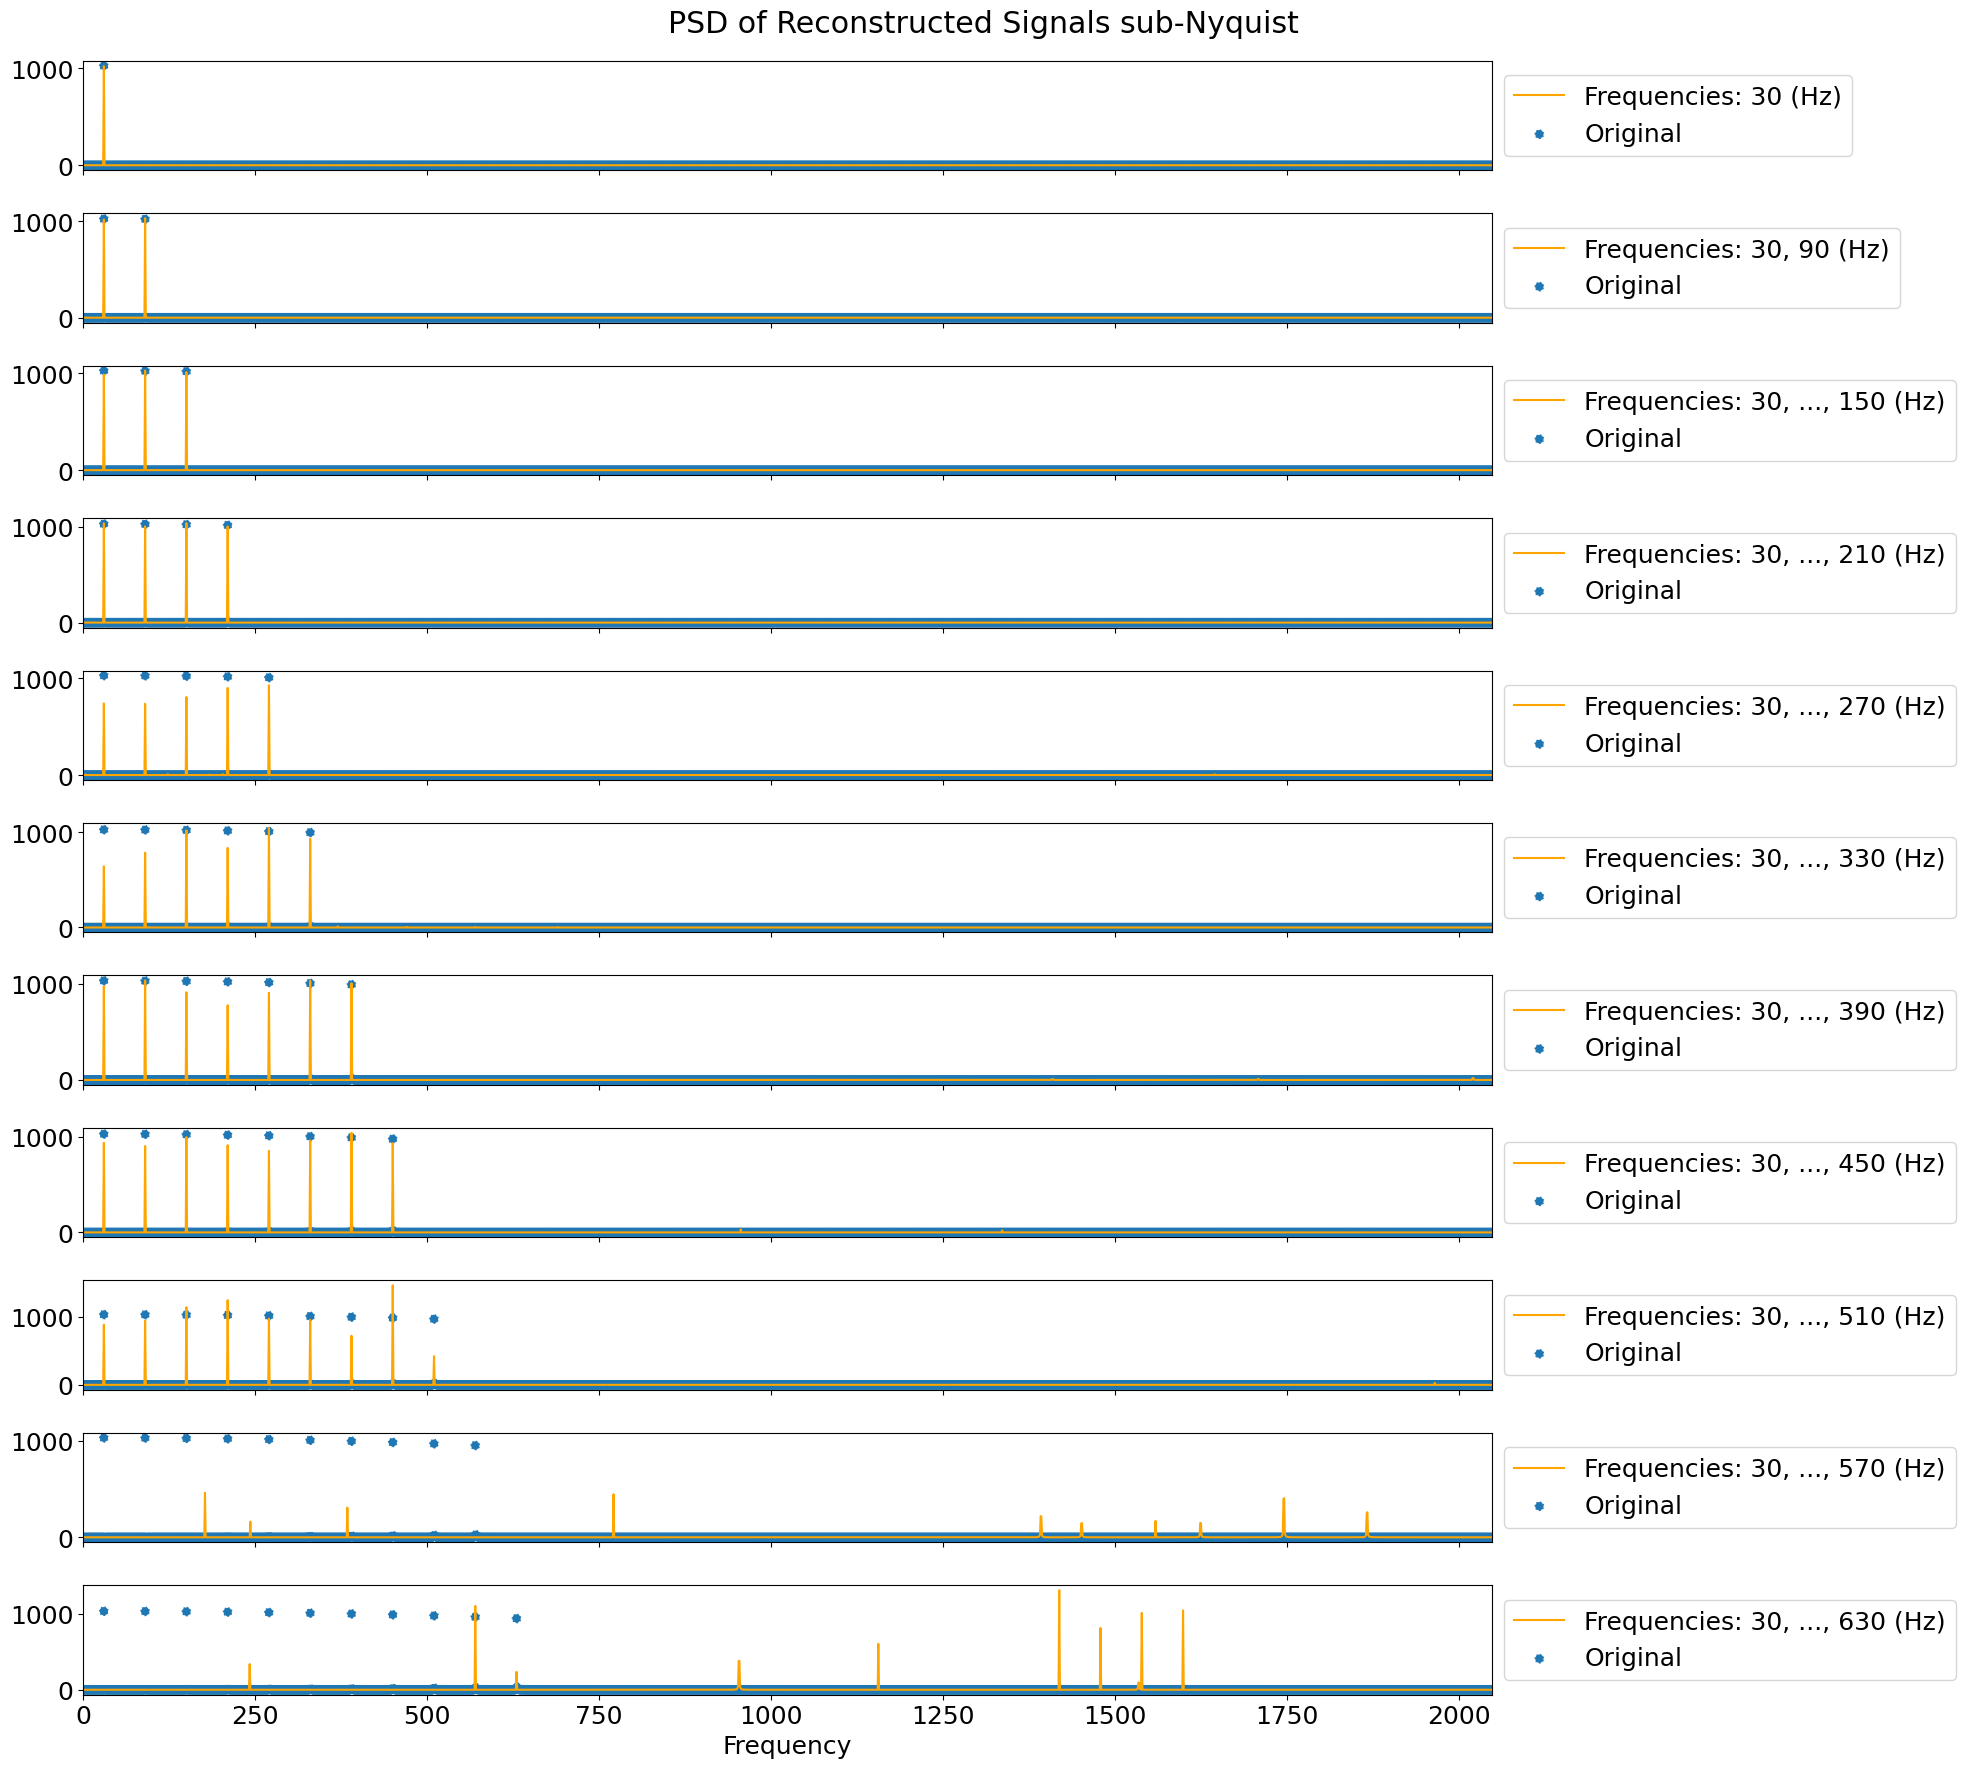

In [21]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})

fig,axs = plt.subplots(len(frequencies),1)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)
legend = "Frequencies: "

for i, pt in enumerate(frequencies):
    if i <= 1:
        if pt == 30:
            legend += str(pt)
        else:
            legend += ", " + str(pt)
    else:
        legend = "Frequencies: 30, ..., " + str(pt)
    axs[i].plot(abs(PSD_sub[3][i]), label = legend + " (Hz)", color = "orange")
    axs[i].scatter(frequency_x, abs(PSD_orig[i]), label="Original", color="#1f77b4", linestyle='dotted')  # Original signal
    axs[i].set_xlim(0,n/2)
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if i != len(axs) - 1:
        axs[i].set_xticklabels([])  # Hide x-tick labels

fig.suptitle("PSD of Reconstructed Signals sub-Nyquist")
plt.xlabel("Frequency")
plt.tight_layout(rect=[0, -0.5, 1, 1.01])
plt.show()

Plotted only the 2nd, 4th, 6th, and 8th signal for reporting purposes:

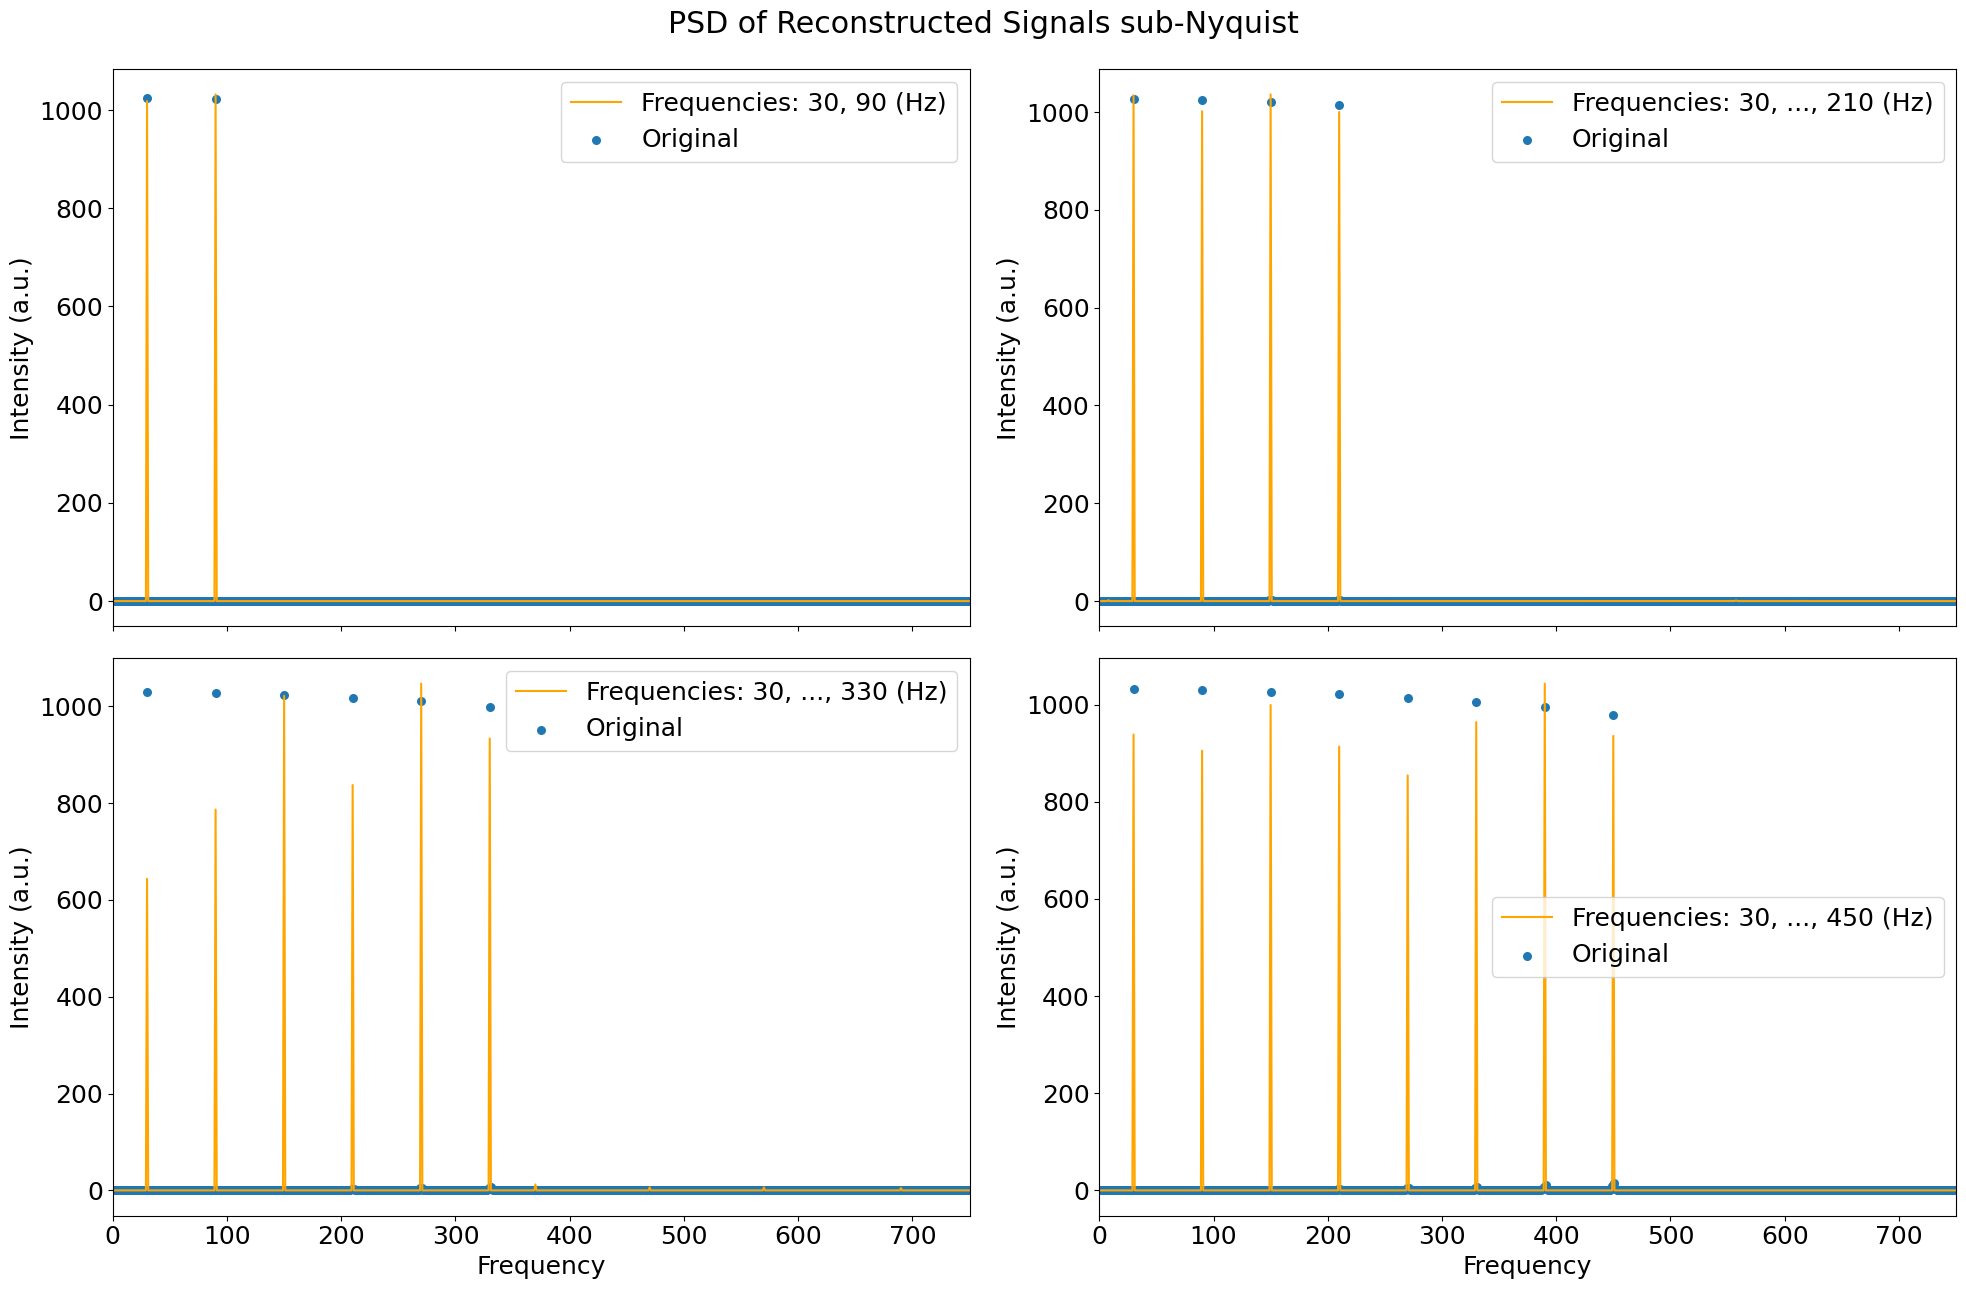

In [23]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})

fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)
legend = "Frequencies: "
selected_indices = [1, 3, 5, 7]

for i, idx in enumerate(selected_indices):
    pt = frequencies[idx]

    if idx <= 1:
        legend = f"Frequencies: 30, {pt}" if pt != 30 else f"Frequencies: {pt}"
    else:
        legend = f"Frequencies: 30, ..., {pt}"
    
    axs[i].plot(abs(PSD_sub[3][idx]), label=legend + " (Hz)", color="orange")
    axs[i].scatter(frequency_x, abs(PSD_orig[idx]), label="Original", color="#1f77b4", s=30)  # `s` controls marker size
    axs[i].set_xlim(0, 750)
    axs[i].set_ylabel("Intensity (a.u.)")
    axs[i].set_xlabel("Frequency")
    axs[i].legend()
    
    # Hide x-axis labels except for the last one
    if i <= 1:
        axs[i].set_xticklabels([])
        axs[i].set_xlabel("")

fig.suptitle("PSD of Reconstructed Signals sub-Nyquist")
plt.tight_layout(rect=[0, -0.1, 1, 1])
plt.show()

Error of reconstructed signal compared to original. Blue is above Nyquist frequency. Orange is sub-Nyquist.

Number of uniformly-spaced sample points for above Nyquist frequency sampling n = 1260

In [24]:
err_reg_signal = []
err_sub_signal = []
err_reg_PSD = []
err_sub_PSD = []

In [25]:
for i, signal_iter in enumerate(reg_recon_per_f):
    err_signal = error_fn.normalized_rmse(orig_signal_per_f[i], signal_iter)
    err_PSD = error_fn.normalized_rmse(PSD_orig[i], PSD_reg[i])
    err_reg_signal.append(err_signal)
    err_reg_PSD.append(err_PSD)

for i1, p_iter in enumerate(sub_recon_per_p):
    err_sub_signal_per_f = []
    err_sub_PSD_per_f = []
    for i2, signal_iter in enumerate(p_iter):
        err_signal = error_fn.normalized_rmse(orig_signal_per_f[i2], signal_iter)
        err_PSD = error_fn.normalized_rmse(PSD_orig[i2], PSD_sub[i1][i2])
        err_sub_signal_per_f.append(err_signal)
        err_sub_PSD_per_f.append(err_PSD)
    err_sub_signal.append(err_sub_signal_per_f)
    err_sub_PSD.append(err_sub_PSD_per_f)

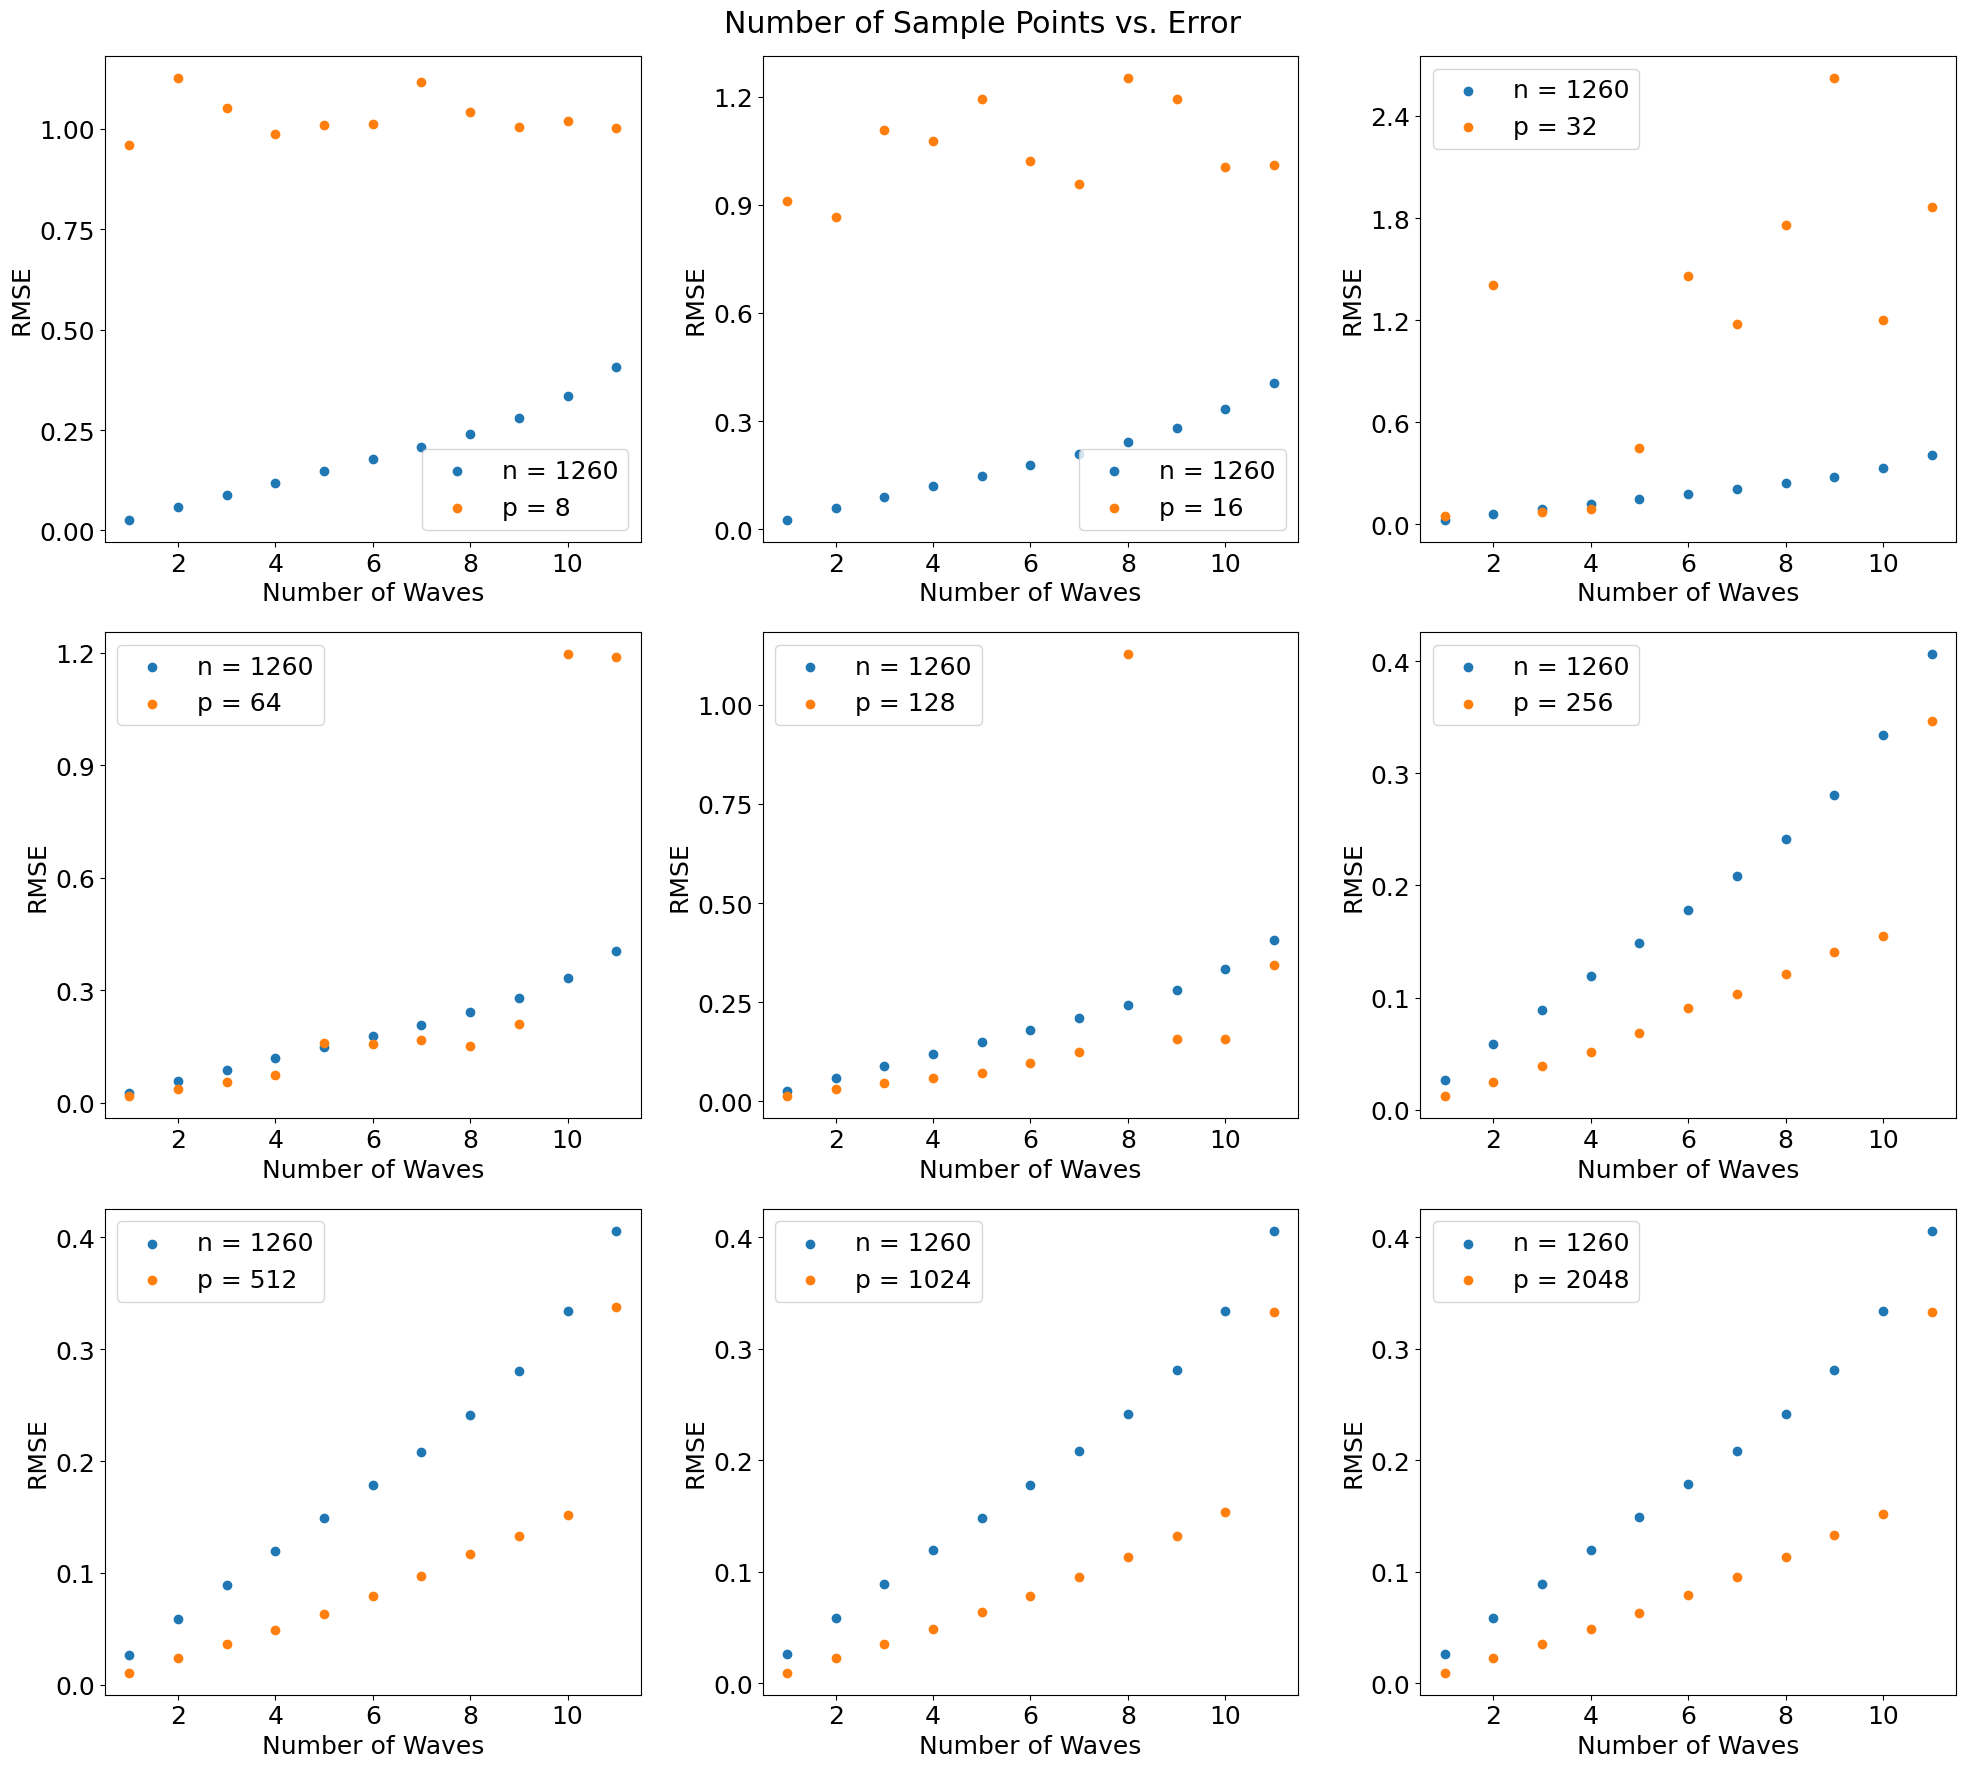

In [28]:
ig1,ax1 = plt.subplots(3,3)
ax1 = ax1.reshape(-1)

for i, err_sub_iter in enumerate(err_sub_signal):
    ax1[i].scatter(no_of_waves,err_reg_signal, label = "n = 1260")
    ax1[i].scatter(no_of_waves,err_sub_iter, label = "p = " + str(p[i]))
    ax1[i].legend()
    ax1[i].set_xlabel("Number of Waves")
    ax1[i].set_ylabel("RMSE")

for ax in ax1:
    ax.tick_params(axis='y', labelrotation=0)

for ax in ax1:
    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=5))

ig1.suptitle("Number of Sample Points vs. Error")
plt.tight_layout(rect=[0, -0.5, 1, 1.01])
plt.show()